In [1]:
%matplotlib inline
import __main__
__main__.pymol_argv = ['pymol','-qc'] # Pymol: quiet and no GUI
import sys, pymol
from pymol import cmd, stored
stdout = sys.stdout
pymol.finish_launching()
sys.stdout = stdout 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

Calcular las distancias de enlace C $\alpha$ - H $\alpha$, C $\alpha$ - N, C $\alpha$ - C' y C $\alpha$ - C $\beta$, para el residue numero 29 (Lys), en una asamblea de ubiquitinas.

In [2]:
job= "Ubiquitin_Ala"
sele = "C"
atom_name= "C'"
pdb_file_name ='2k39.pdb'
cmd.load(pdb_file_name )
n_states = cmd.count_states('all')
n_residues = cmd.count_atoms('name CA')
distance = np.zeros((116, 1))

In [3]:
for s in range(1,n_states+1):    
    conf = []
    #for i in range(1 , n_residues+1):
    try:
        dst = cmd.get_distance('resi 46 and name CA', 'resi 46 and name %s' % (sele), state = s)
        conf.append(dst)
    except:
        conf.append(np.nan)
        pass
    distance[s-1] = conf

In [4]:
dst_df = pd.DataFrame(distance)

In [5]:
a = dst_df.dropna(1 , 'all')

In [6]:
b = np.array(a)

IndexError: index 1 is out of bounds for axis 0 with size 1

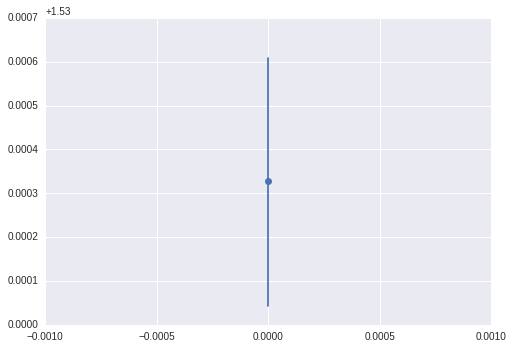

In [7]:
ax = sns.tsplot(data = b , interpolate=False, err_style="ci_bars", ci=50)
plt.xlabel("Residue")

if sele == "HA":
    plt.ylabel("C$\\alpha$ - H$\\alpha$ Distance ($\\AA$)" )
    
elif sele == "C":
    plt.ylabel("C$\\alpha$ - C' Distance ($\\AA$)") 
    
else:
    plt.ylabel(("C$\\alpha$ - %s Distance ($\\AA$)") % (sele) )
    
plt.savefig("distances_%s_%s.png" % (job, sele), dpi = 300)

In [8]:
c = b.flatten()
mu = np.mean(c)
sigma = np.std(c)
sigma

0.004436635617499185

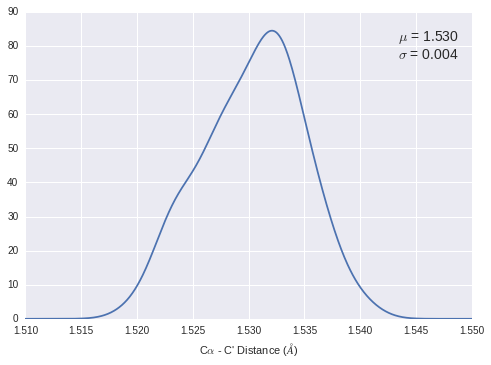

In [9]:
sns.kdeplot(c, gridsize=50000)
plt.plot(0, label='$\\mu$ = {:.3f}\n$\\sigma$ = {:.3f}'.format(mu, sigma), alpha=0)
plt.xlim(1.51, 1.55)
plt.xlabel("C$\\alpha$ - %s Distance ($\\AA$)" % (atom_name))
plt.legend(loc=1, fontsize=14)
plt.savefig("distances_kde_%s_%s.png" % (job, sele), dpi = 300)

In [2]:
data = np.genfromtxt('datos_J.csv', delimiter=',')
pd.DataFrame(data)
K_29 = data[25,:]
A_46 = data[41,:]